## **DATASET OPERATIONS**

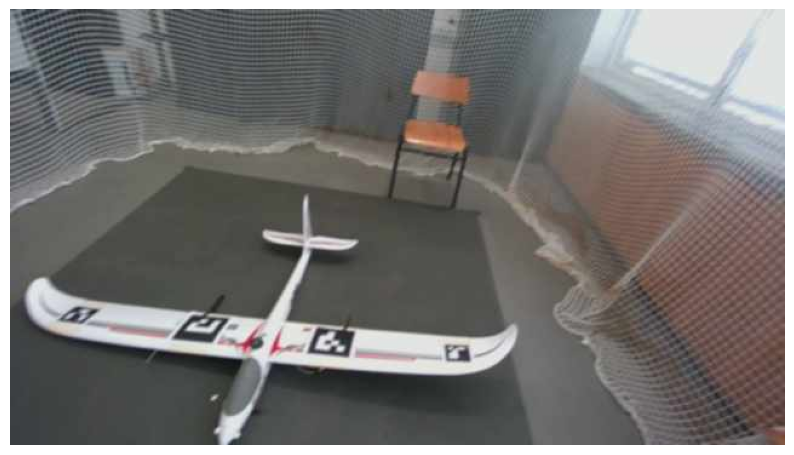

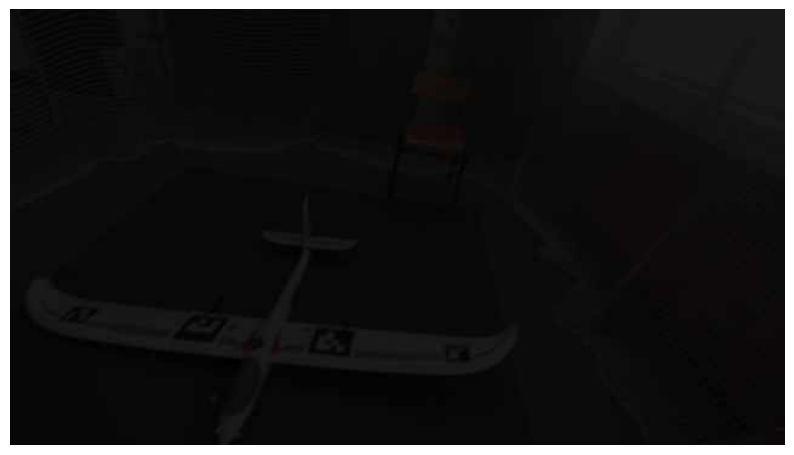

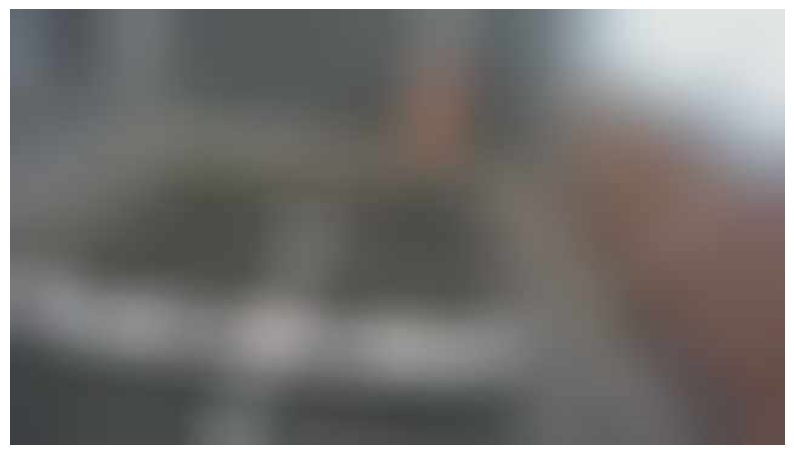

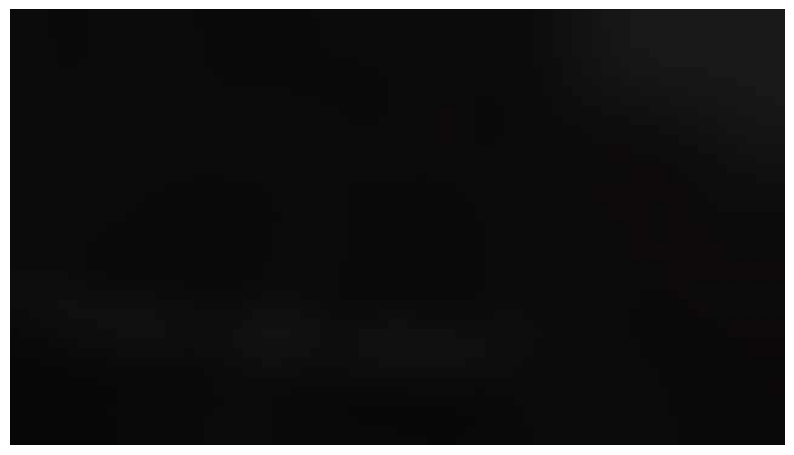

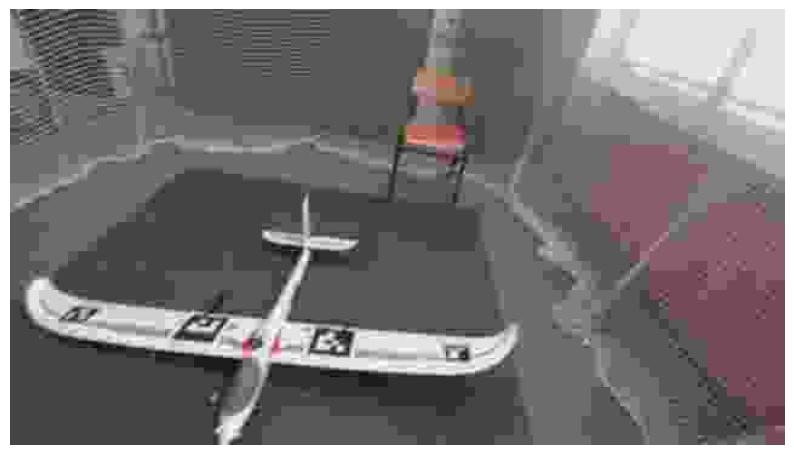

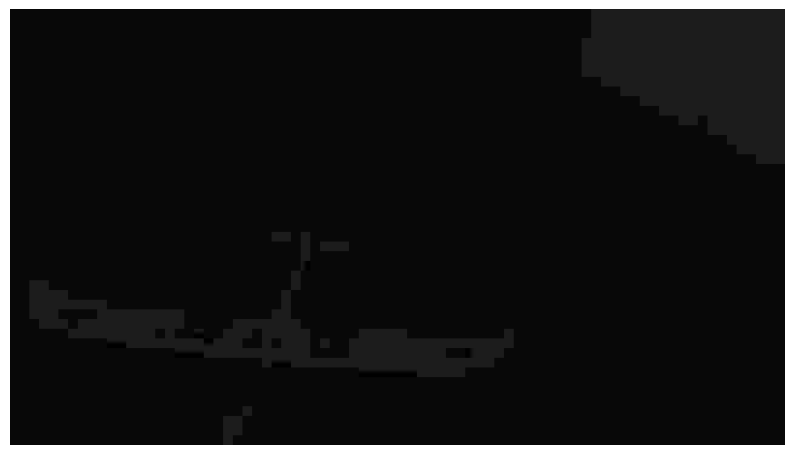

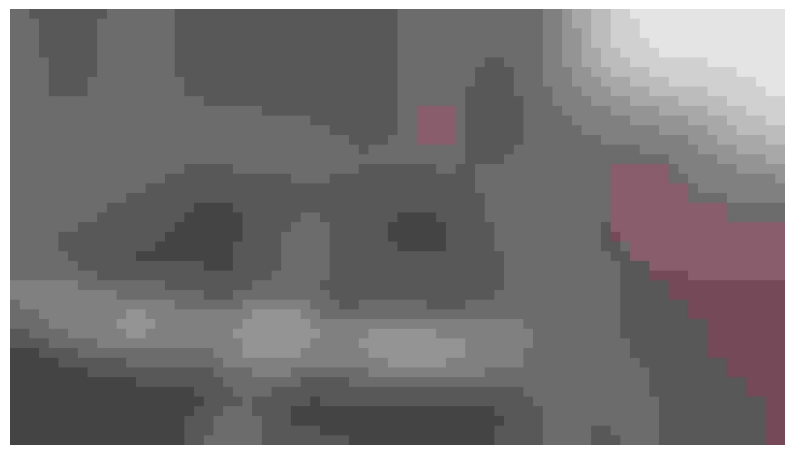

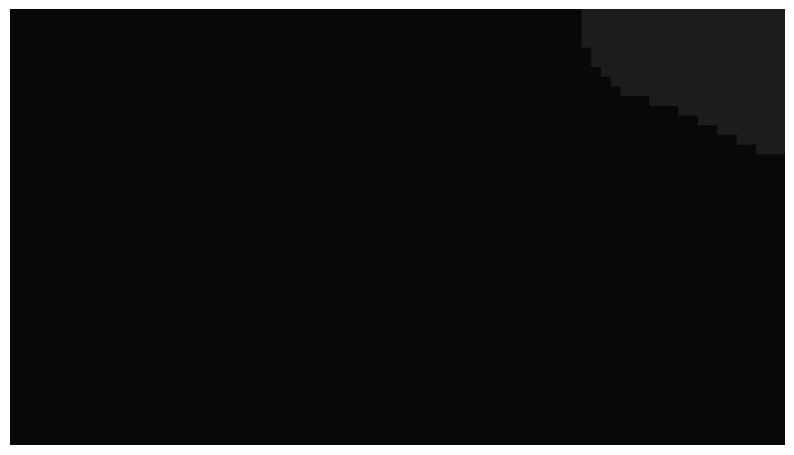

DONE


In [13]:
################################################################################
# DATASET OPERATIONS
################################################################################
"""
    Description
        Has the tools to make new datasets with specific changes.

    Aux Functions
        make_d_dark     : Darken the image.
        make_d_blur     : Blur the image.
        make_d_quality  : Change the quality of the image.
        make_combo      : Make a combination of 3 distortions.

    Debug Functions
        test_distortion_levels : Test the distortion levels.

    Main Functions
        make_alternative_datasets : Creates a folder with n datasets with a specific distortion ranging in intensity.
        make_combination_datasets : Creates a folder with 8 datasets with all the combinations of 3 distortions.

    Arguments
        img_path   : path to the image to be tested.
        src_path   : folder with the default dataset.
        dir_path   : directory where the folder with the new datasets will be placed.
        dist_list  : list of the 3 distortions (IN ORDER) to be combined.
        distortion : distortion.

    Prerequesites
        functions   : list of functions that perform the distortion.
        levels      : list of levels for each distortion, according to the functions.
"""

# PERMISSIONS       ############################################################

# Global Permission
launch            = True

# Function Permissions
run_test_distortion_levels    = False
run_make_alternative_datasets = False
run_make_combination_datasets = True

# IMPORTS           ############################################################

if 'dataset_operations' not in globals():
    from google.colab.patches import cv2_imshow
    import matplotlib.pyplot as plt
    from google.colab import drive
    import numpy as np
    import cv2
    import os
    dataset_operations = True


# PARAMETERS        ############################################################

img_path   = "/content/drive/MyDrive/Tese/Datasets/dataset_normal/testing/img_2057_F.png"
src_path   = "/content/drive/MyDrive/Tese/Datasets/dataset_normal/testing/"
dir_path   = "/content/drive/MyDrive/Tese/Datasets/dataset_alternativo/"
dist_list  = ["dark", "blur", "quality"]
distortion = "blur"

# AUX FUNCTIONS     ############################################################

def make_d_dark(img, level):
    return np.clip(img * (1 - level), 0, 255).astype(np.uint8)

def make_d_blur(img, level):
    return cv2.GaussianBlur(img, (level[0], level[0]), level[1])

def make_d_quality(img, level):
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), level]
    _, encoded_img = cv2.imencode('.jpg', img, encode_param)
    return cv2.imdecode(encoded_img, 1)

def make_combo(src_path, dst_folder, function, level):
    for img_name in os.listdir(src_path):
        #cv2.imwrite(dst_folder + "/" + img_name, function[2](function[1](function[0](cv2.imread(src_path + img_name), level[0]), level[1]), level[2]))
        img = function[2](function[1](function[0](cv2.imread(src_path + img_name), level[0]), level[1]), level[2])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        break

def test_distortion_levels(img_path, function, levels):
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    for level in levels:
        plt.figure(figsize=(10, 10))
        plt.imshow(function(img, level))
        plt.axis('off')
        plt.show()

def test_distortion_levels2(dist, img_path, function, levels):
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 5))
    if dist == 'temp':
        print("________________________________________________________________________________________________________________________________________________________________________________")
    for i, level in enumerate(levels):
        distorted_img = function(img, level)
        plt.subplot(1, len(levels), i + 1)
        plt.imshow(distorted_img)
        if dist == 'dark':
            k=int(level*100)
            plt.title(f"{k}%")
        elif dist == 'blur':
            plt.title(f"k={level[0]} \u03C3={level[1]}")
        elif dist == 'quality':
            plt.title(f"encode: {level}")
        elif dist == 'temp':
            k = int(level*10)
            plt.title(f"Level: {k}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# MAIN FUNCTION     ############################################################
def make_alternative_datasets(src_path, dst_path, function, levels):
    """
        Description
            Creates a folder with n datasets with a specific distortion ranging in intensity.

        Arguments
            src_path    : folder with the default dataset.
            dir_path    : directory where the folder with the new datasets will be placed.
            distortion  : distortion.

        Prerequesites
            functions   : list of functions that perform the distortion.
            levels      : list of levels for each distortion, according to the functions.
    """
    if not os.path.exists(dst_path):
            os.makedirs(dst_path)
    dst_path = dst_path + "d_"
    count = 1
    total = len(levels)
    for level in levels:
        print(str(count) + "/" + str(total))
        dst_folder = dst_path + "/d_" + str(count)
        count += 1
        if not os.path.exists(dst_folder):
            os.makedirs(dst_folder)
        for img_name in os.listdir(src_path):
            cv2.imwrite(dst_folder + "/" + img_name, function(cv2.imread(src_path + img_name), level))

# MAIN FUNCTION 2   ############################################################
def make_combination_datasets(src_path, dst_path, combo):
    """
        Description
            Creates a folder with 8 datasets with a specific combination of 3 distortions.

        Arguments
            src_path    : folder with the default dataset.
            dir_folder  : directory where the folder with the new datasets will be placed.
            dist_list   : list of the 3 distortions (IN ORDER) to be combined

        Prerequesites
            functions   : list of functions that perform the distortion.
            levels      : list of min and max levels for each distortion, according to the functions.
    """
    for dist_3 in range(2):
        for dist_2 in range(2):
            for dist_1 in range(2):
                dst_folder = dst_path + "d_" + str(dist_3) + str(dist_2) + str(dist_1)
                #if not os.path.exists(dst_folder):
                #    os.makedirs(dst_folder)
                make_combo(src_path, dst_folder, combo[0], [combo[1][0][dist_1], combo[1][1][dist_2], combo[1][2][dist_3]])

# PREREQUISITES     ############################################################

functions    = {
             "dark"    : make_d_dark,
             "blur"    : make_d_blur,
             "quality" : make_d_quality
    }

levels       = {
             "dark"    : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
             "blur"    : [[3, 1], [5, 2], [9, 3], [15, 5], [23, 7], [33, 11], [45, 15], [59, 20], [75, 25]],
             "quality" : [45, 40, 35, 30, 25, 20, 15, 10, 5]
    }

edge_levels = {
             "dark"    : [0.1, 0.9],
             "blur"    : [[3, 1], [75, 25]],
             "quality" : [45, 5]
    }

# LAUNCH            ############################################################

if launch:

    #for dist in dist_list:
    #    if run_test_distortion_levels:
    #        test_distortion_levels(
    #            dist,
    #            img_path,
    #            functions[dist],
    #            levels[dist])
    #dist = 'dark'
    if run_test_distortion_levels:
            test_distortion_levels(
                'temp',
                img_path,
                functions[dist],
                levels[dist])

    if run_make_alternative_datasets:
        make_alternative_datasets(
            src_path,
            dir_path + "d_" + distortion + "/",
            functions[distortion],
            levels[distortion]
        )

    if run_make_combination_datasets:
        combo = [[], []]
        for dist in dist_list:
            combo[0].append(functions[dist])
            combo[1].append(edge_levels[dist])
        make_combination_datasets(
            src_path,
            dir_path + "d_combo/",
            combo
        )

print("DONE")

## **MODEL OPERATIONS**

In [ ]:
################################################################################
# MODEL OPERATIONS
################################################################################
"""
    Description
        Has the tools to train a model with a chosen architecture and dataset.

    Aux Functions
        save_new_model  : Save the trained model.

    Main Functions
        make_dataset    : Create the dataset.
        make_model      : Create the model.
        train_model     : Train the model.

    Arguments
        img_test_path  : path to the image to be tested.
        dataset_path   : path to the dataset.
        dst_path       : path to the folder where the model will be saved.
        class_mode     : class mode of the dataset (categorical).
        target_size    : target size of the images (180, 320).
        rescale_factor : rescale factor of the images (255).
        batch_size     : batch size of the dataset (32).
        epochs         : epochs of the training (20).
        settings       : choosing the right functions

    Prerequesites
        setting_list   : list of the functions to be used.
"""

# PERMISSIONS       ############################################################

# Global Permission
launch            = True

# Aux Functions
run_save_new_model = False

# Main Functions
run_make_dataset   = False
run_make_model     = False
run_train_model    = False

# IMPORTS           ############################################################

if 'model_operations' not in globals():
#if True:
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    from tensorflow.keras.preprocessing import image
    from tensorflow.keras.models import load_model
    from sklearn.metrics import confusion_matrix
    from google.colab.patches import cv2_imshow
    from tensorflow.keras.layers import Input
    import matplotlib.pyplot as plt
    from datetime import datetime
    import torch.optim as optim
    import tensorflow as tf
    import seaborn as sns
    from tqdm import tqdm
    import absl.logging
    import numpy as np
    import math
    import cv2
    import os
    absl.logging.set_verbosity(absl.logging.ERROR)
    model_operations = True

# PARAMETERS        ############################################################

img_test_path  = "/content/drive/MyDrive/Tese/Datasets/dataset_normal/testing/img_2057_F.png"
dataset_path   = "/content/drive/MyDrive/Tese/Datasets/dataset_normal/"
dst_path       = "/content/drive/MyDrive/Tese/Models/"
class_mode     = "categorical"
target_size    = (180, 320)
rescale_factor = 255
batch_size     = 32
epochs         = 20
# Choosing the right functions
settings = {
    'dataset'  : 1,
    'model'    : 1,
    'training' : 1
}

# AUX FUNCTIONS     ############################################################

def save_new_model(model, dst_path):
    if not os.path.exists(dst_path):
        os.makedirs(dst_path)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"model_{timestamp}.h5"
    full_path = os.path.join(dst_path, filename)
    model.save(full_path)
    print(f"Model saved at: {full_path}")

# MAIN FUNCTION     ############################################################

def make_dataset_1(dataset_path, class_mode, target_size, rescale_factor, batch_size):
    """
        Description
            Creates a dataset (training and validation) with the given folder.

        Arguments
            dataset_path   : path to the dataset.
            class_mode     : class mode of the dataset (categorical).
            target_size    : target size of the images (180, 320).
            rescale_factor : rescale factor of the images (255).
            batch_size     : batch size of the dataset (32).

        Prerequesites
            The folder has to have this hierarchy:
                dataset_path    | > training    | > class 1 (F)
                                |               | > class 2 (L)
                                |               | > class 3 (R)
                                |
                                | > validation  | > class 1 (F)
                                |               | > class 2 (L)
                                |               | > class 3 (R)
                                |
                                | > testing

            The order of any folder/class/image is irrelevant
    """
    # Calculate variables
    input_shape = (target_size[0], target_size[1], 3)
    train = ImageDataGenerator(rescale=1/rescale_factor)
    valid = ImageDataGenerator(rescale=1/rescale_factor)
    # Training dataset
    print("Training dataset:")
    train_dataset = train.flow_from_directory(
        dataset_path + "training/",
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode
    )
    num_images_train = train_dataset.samples
    # Validation dataset
    print("Validation dataset:")
    valid_dataset = valid.flow_from_directory(
        dataset_path + "validation/",
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode
    )
    num_images_valid = valid_dataset.samples
    # Image info
    print("Analizing the images:")
    s = cv2.imread(dataset_path + "testing/img_2057_F.png").shape
    print("Image shape:", s)
    print("Input shape:", input_shape)
    print("Class indices:", train_dataset.class_indices)
    # Return
    dataset = {
        "training"    : train_dataset,
        "validdation" : valid_dataset
    }
    return dataset

def make_model_1(target_size):
    """
        Description
            Creates a model with the given input shape (target_size).

        Arguments
            target_size : input shape of the model (180, 320, 3).

        Prerequesites
            The model's architecture has to be defined here
    """
    # Architecture
    model_1 = tf.keras.models.Sequential([
        # 1st Convolutional Layer
        Input(shape=target_size),
        tf.keras.layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
        # 2nd Convolutional Layer
        tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
        # 3rd Convolutional Layer
        tf.keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        # 4th Convolutional Layer
        tf.keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        # 5th Convolutional Layer
        tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
        # Flatten Layer
        tf.keras.layers.Flatten(),
        # 1st Fully Connected Layer
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        # 2nd Fully Connected Layer
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        # Output Layer
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    # Compilation
    model.compile(
        loss      = 'categorical_crossentropy',
        optimizer = 'adam',
        metrics   = ['accuracy']
    )
    # Summary
    model.summary()
    # Return
    return model

def train_model_1(dataset, model, epochs, run_save_new_model_flag, dst_path):
    """
        Description
            Trains the model with the given dataset and epochs.
            Can save the trained model.

        Arguments
            dataset                 : dataset to be used for training.
            model                   : model to be trained.
            epochs                  : number of epochs to be used for training.
            run_save_new_model_flag : flag to save the trained model.
            dst_path                : path to save the trained model.

        Prerequesites
            The model has to be compiled before training.
            Function to save the model not included.
    """
    # Train
    history = model.fit(
        dataset["training"],
        #steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=dataset["validation"],
        #validation_steps=validation_steps
    )
    # Get data from training
    acc      = history.history['accuracy']
    val_acc  = history.history['val_accuracy']
    loss     = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(acc) + 1)
    # Plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
    # Check if it saves the trained model
    if run_save_new_model_flag:
        save_new_model(model, dst_path)
    # Return (changes made on the 'model' itself)
    return

# PREREQUISITES     ############################################################

settings_list = {
    'make_datasets'    : [
        make_dataset_1
    #   make_dataset_2
    ],
    'make_models'      : [
        make_model_1
    #   make_model_2
    ],
    'train_models'     : [
        train_model_1
    #   train_model_2
    ]
}

make_dataset      = settings_list["make_datasets"][settings["dataset"]-1]
make_model        = settings_list["make_models"][settings["model"]-1]
train_model       = settings_list["train_models"][settings["training"]-1]

if run_train_model:
    run_make_dataset = True
    run_make_model   = True

# LAUNCH            ############################################################

if launch:
    # make_dataset
    if run_make_dataset:
        dataset = make_dataset(
            dataset_path,
            class_mode,
            target_size,
            rescale_factor,
            batch_size
        )
    #make_model
    if run_make_model:
        model = make_model(
            target_size
        )
    #train_model
    if run_train_model:
        train_model(
            dataset,
            model,
            epochs,
            run_save_new_model,
            dst_path
        )

print("DONE")

DONE


## **TEST OPERATIONS**

In [8]:
################################################################################
# TEST OPERATIONS
################################################################################
"""
"""

# model.save("/content/drive/MyDrive/model/model.h5")

# PERMISSIONS       ############################################################

# Global Permission
launch              = True

# Aux Functions
show_info_wrong     = False

# Main Functions

run_test_with_cm    = False
run_dist_sensivity  = False
run_plot_test_combo = True


# IMPORTS           ############################################################

if True:#'test_operations' not in globals():
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    from tensorflow.keras.preprocessing import image
    from tensorflow.keras.models import load_model
    from sklearn.metrics import confusion_matrix
    from google.colab.patches import cv2_imshow
    from tensorflow.keras.layers import Input
    from scipy.interpolate import griddata
    import plotly.graph_objects as go
    import matplotlib.pyplot as plt
    import torch.optim as optim
    import tensorflow as tf
    import seaborn as sns
    from tqdm import tqdm
    import absl.logging
    import numpy as np
    import math
    import cv2
    import os
    absl.logging.set_verbosity(absl.logging.ERROR)
    test_operations = True

# PARAMETERS        ############################################################

src_folder     = "/content/drive/MyDrive/Tese/Datasets/dataset_normal/testing/"
dir_path       = "/content/drive/MyDrive/Tese/Datasets/dataset_alternativo/"
model_path     = "/content/drive/MyDrive/model/model.h5"


# AUX FUNCTIONS     ############################################################

def get_saved_model(model_path):
    return load_model(model_path)

def show_info_wrong(img, img_name, pred_, count_wrong, count_current):
    print("--------------------------------------------------")
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    if pred_ == 'F': pred = "Forward"
    if pred_ == 'L': pred = "Left"
    if pred_ == 'R': pred = "Right"
    if img_name[9] == 'F': true_value = "Forward"
    if img_name[9] == 'L': true_value = "Left"
    if img_name[9] == 'R': true_value = "Right"
    print("Tested      :  ", count_current)
    print("Failed      :  ", count_wrong)
    print("Prediction  :  ", pred)
    print("Class       :  ", true_class)
    #print("Angle       :  ", i[10:-4])
    print("Image Index :  ", img_name[4:8])

def test_folder(model, src_folder):
    last_dir = os.path.basename(os.path.normpath(src_folder)) + "/"
    desc = "Testing on \"" + last_dir + "\""
    classes = np.array([[70], [76], [82]])
    count_right = 0
    count_wrong = 0
    count_total = len(os.listdir(src_folder))
    for img_name in tqdm(os.listdir(src_folder), desc=desc, unit="image"):
        img = image.load_img(src_folder + img_name, target_size = model.input_shape[1:3])
        X = image.img_to_array(img) / 255.0
        X = np.expand_dims(X, axis = 0)
        images = np.vstack([X])
        val = np.round(model.predict(images, verbose=0)[0])
        pred = chr(int(np.dot(val, classes)[0]))
        if img_name[9] != pred:
            count_wrong += 1
            continue
        count_right += 1
    return 100 - 100 * float(count_right)/float(count_total)

def test_dist_folder(model, dir_path, dist):
    ratings = [98.28767123287672]
    src_path = dir_path + "d_" + dist + "/"
    for src_folder in os.listdir(src_path):
        ratings.append(100 - test_folder(model, src_path + src_folder + "/"))
    print(dist + " rated")
    return ratings

def plot_multiple_xy(data):
    labels = ['Darkness', 'Blur', 'Quality']
    x = np.arange(10)
    colors = ['blue', 'green', 'red']
    plt.figure(figsize=(8, 6))
    for i, y in enumerate(data):
        plt.plot(x, y, marker='o', color=colors[i], label=labels[i])
    plt.xlabel('Level of disturbance')
    plt.ylabel('% of correct predictions')
    plt.title('Model\'s Performance on Increasingly More Disturbed Images')
    plt.legend()
    plt.grid(True, alpha=0.5)
    plt.show()

# MAIN FUNCTION     ############################################################

def test_with_cm(model, src_folder, show_info_wrong):
    # Classes
    true_classes = []
    predicted_classes = []
    classes = np.array([[70], [76], [82]])
    # Counters
    count_right = 0
    count_wrong = 0
    count_total = len(os.listdir(src_folder))
    # Image loop
    for img_name in os.listdir(src_folder):
        img = image.load_img(src_folder + img_name, target_size = model.input_shape[1:3])
        X = image.img_to_array(img) / 255.0
        X = np.expand_dims(X, axis = 0)
        images = np.vstack([X])
        val = np.round(model.predict(images, verbose=0)[0])
        pred = chr(int(np.dot(val, classes)[0]))
        true_class = img_name[9]
        true_classes.append(img_name[9])
        predicted_classes.append(pred)
        if img_name[9] != pred:
            count_wrong += 1
            if show_info:
                show_info_wrong(show_img, img_name, pred, count_wrong, count, count_total)
            continue
        count_right += 1
    print("--------------------------------------------------")
    print("Total    : ", count_total)
    print("Right    : ", count_right)
    print("Wrong    : ", count_wrong)
    print("Accuracy : {:.2f}".format(100-(100 * float(count_wrong)/float(count_total))), "%")
    print("--------------------------------------------------")
    # Confusion Matrix
    label_map = {'L': 0, 'F': 1, 'R': 2}
    true_classes_num = [label_map[label] for label in true_classes]
    predicted_classes_num = [label_map[label] for label in predicted_classes]
    cm = confusion_matrix(true_classes_num, predicted_classes_num)
    class_names = ['Left', 'Forward', 'Right']
    # Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix of Drone Orientation Classification')
    plt.show()

def dist_sensivity(model, dir_path):
    # Get the ratings
    ratings = [
        test_dist_folder(model, dir_path, "dark"),
        test_dist_folder(model, dir_path, "blur"),
        test_dist_folder(model, dir_path, "quality"),
    ]
    # Plot the ratings
    plot_multiple_xy(ratings)

def plot_test_combo2(model, dir_path):
    # Arrays
    dark    = np.array([10, 90, 10, 90, 10, 90, 10, 90])
    blur    = np.array([10, 10, 90, 90, 10, 10, 90, 90])
    quality = np.array([10, 10, 10, 10, 90, 90, 90, 90])
    res     = np.array([0, 0, 0, 0, 0, 0, 0, 0])
    # Path
    src_path = dir_path + "d_combo/d_"
    # Counter
    count = 0
    # Folder loop
    for q in range(2):
        for b in range(2):
            for d in range(2):
                src_folder = src_path + str(d) + str(b) + str(q) + "/"
                print(src_folder)
                #a = test_folder(model, src_folder)
                #print(a)
                #return
                res[count] = test_folder(model, src_folder)
                #print(res[count])
                count += 1

    print(res)
    # Grids
    grid_x, grid_y, grid_z = np.mgrid[0:100:50j, 0:100:50j, 0:100:50j]
    grid_c = griddata((dark, blur, quality), res, (grid_x, grid_y, grid_z), method='linear')
    masked_grid_c = np.where(np.isnan(grid_c) | (grid_c == 0), -1, grid_c)
    # Plot
    fig = go.Figure(data=go.Volume(
        x=grid_x.flatten(),
        y=grid_y.flatten(),
        z=grid_z.flatten(),
        value=masked_grid_c.flatten(),
        isomin=0,
        isomax=100,
        opacity=1,
        surface_count=30,
        colorscale=[
            [0.0, 'green'],
            [0.5, 'yellow'],
            [1.0, 'red']
        ],
        colorbar=dict(title='CNN Error Rate (%)')
    ))
    # Axis
    fig.update_layout(scene=dict(
        xaxis_title='Blur Severity',
        yaxis_title='Darkness Severity',
        zaxis_title='Quality Reduction Severity'
    ))
    fig.show()

def plot_test_combo(model, dir_path):
    dark    = np.array([10, 90, 10, 90, 10, 90, 10, 90])
    blur    = np.array([10, 10, 90, 90, 10, 10, 90, 90])
    quality = np.array([10, 10, 10, 10, 90, 90, 90, 90])
    res     = np.array([ 1, 59, 16, 59,  2, 59, 17, 59])

    # Grids
    grid_x, grid_y, grid_z = np.mgrid[0:100:50j, 0:100:50j, 0:100:50j]
    grid_c = griddata((dark, blur, quality), res, (grid_x, grid_y, grid_z), method='linear')
    masked_grid_c = np.where(np.isnan(grid_c) | (grid_c == 0), -1, grid_c)
    # Plot
    fig = go.Figure(data=go.Volume(
        x=grid_x.flatten(),
        y=grid_y.flatten(),
        z=grid_z.flatten(),
        value=masked_grid_c.flatten(),
        isomin=0,
        isomax=100,
        opacity=1,
        surface_count=30,
        colorscale=[
            [0.0, 'green'],
            [0.5, 'yellow'],
            [0.6, 'red'],
            [1.0, 'red']
        ],
        colorbar=dict(title='CNN Error Rate (%)')
    ))
    # Axis
    fig.update_layout(scene=dict(
        xaxis_title='Darkness Severity',
        yaxis_title='Blur Severity',
        zaxis_title='Quality Reduction Severity'
    ))
    fig.show()


# PREREQUISITES     ############################################################

model = get_saved_model(model_path)

# LAUNCH            ############################################################

if launch:
    if run_test_with_cm:
        test_with_cm(
            model,
            src_folder,
            show_info_wrong
        )
    if run_dist_sensivity:
        dist_sensivity(
            model,
            dir_path
        )
    if run_plot_test_combo:
        plot_test_combo(
            model,
            dir_path
        )

print("DONE")

Output hidden; open in https://colab.research.google.com to view.

## **CONTINUOUS APPROACH**

In [ ]:
##################################################
# DATASET
##################################################

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence
import tensorflow as tf
import numpy as np
import os
import re
import cv2
import matplotlib.pyplot as plt

dataset_path = "/content/drive/MyDrive/Tese/Datasets/dataset_uno/"
rescale_factor = 255
datagen = ImageDataGenerator(rescale=1/rescale_factor)
target_size = (240, 320)
batch_size = 32

class ContinuousLabelGenerator(Sequence):
    def __init__(self, directory, datagen, target_size, batch_size):
        self.directory = directory
        self.datagen = datagen
        self.target_size = target_size
        self.batch_size = batch_size
        self.image_paths = [directory + fname for fname in os.listdir(directory) if fname.endswith(".png")]

    def __len__(self):
        return int(np.ceil(len(self.image_paths) / float(self.batch_size)))

    def __getitem__(self, idx):
        # Get a batch of image paths
        batch_paths = self.image_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        print(len(batch_paths))

        # Load and preprocess images
        images = []
        for path in batch_paths:
            img = tf.keras.preprocessing.image.load_img(path, target_size=self.target_size)
            img_array = tf.keras.preprocessing.image.img_to_array(img) / rescale_factor
            images.append(img_array)

        # Extract labels from filenames
        labels = []
        for path in batch_paths:
            # Use regex to capture the float value from the filename
            #print(path)
            label = float(re.search(r'img_\d+_[A-Za-z]_(-?[\d.]+).png', path).group(1))
            #print("label = ", label)
            labels.append(label)

        return np.array(images), np.array(labels)

# Initialize the generators
train_generator = ContinuousLabelGenerator(directory=dataset_path + "training/",
                                           datagen=datagen,
                                           target_size=target_size,
                                           batch_size=batch_size)

valid_generator = ContinuousLabelGenerator(directory=dataset_path + "validation/",
                                           datagen=datagen,
                                           target_size=target_size,
                                           batch_size=batch_size)
info = True
if info:
    # Example of reading a single image to display its shape
    s = cv2.imread(dataset_path + "testing/img_459_R_104.073.png").shape
    print("Image shape:", s)
    print("Input shape:", target_size + (3,))  # Target shape used in the generator

    # Get the number of training and validation images from the generator
    num_images_train = len(train_generator.image_paths)
    num_images_valid = len(valid_generator.image_paths)

    print("Number of training images:", num_images_train)
    print("Number of validation images:", num_images_valid)

Image shape: (480, 640, 3)
Input shape: (240, 320, 3)
Number of training images: 323
Number of validation images: 72


In [ ]:
##################################################
# MODEL
##################################################
import matplotlib.pyplot as plt
import torch.optim as optim
import tensorflow as tf

model = tf.keras.models.Sequential([
    # 1st Convolutional Layer
    tf.keras.layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(240, 320, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    # 2nd Convolutional Layer
    tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    # 3rd Convolutional Layer
    tf.keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu'),

    # 4th Convolutional Layer
    tf.keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu'),

    # 5th Convolutional Layer
    tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    # Flatten Layer
    tf.keras.layers.Flatten(),

    # 1st Fully Connected Layer
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    # 2nd Fully Connected Layer
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    # Output Layer with one neuron and linear activation
    tf.keras.layers.Dense(1, activation='linear'),

    # Lambda layer to scale output to range 0-180
    tf.keras.layers.Lambda(lambda x: x * 180, name="scaled_output")
])

# Compile the model with Mean Squared Error loss for regression
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()


# Get the model's raw output and scale it between 0 and 180
raw_prediction = model.predict(test_dataset)
scaled_prediction = raw_prediction * 180  # Assuming raw output is in range 0 to 1


# Add this as the last layer for scaled output between 0 and 180
model.add(tf.keras.layers.Lambda(lambda x: x * 180, name="scale_output"))


history = model.fit(train_dataset,
                      steps_per_epoch = 11,
                      epochs = 30,
                      validation_data = validation_dataset)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 78, 68, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 38, 33, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 38, 33, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 18, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 18, 16, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 18, 16, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 18, 16, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 8, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 14336)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4096)                │      58,724,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │           4,097 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ scaled_output (Lambda)               │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,256,961 (302.34 MB)

 Trainable params: 79,256,961 (302.34 MB)

 Non-trainable params: 0 (0.00 B)

NameError: name 'test_dataset' is not defined

In [ ]:
##################################################
# TEST
##################################################

## **DEV**

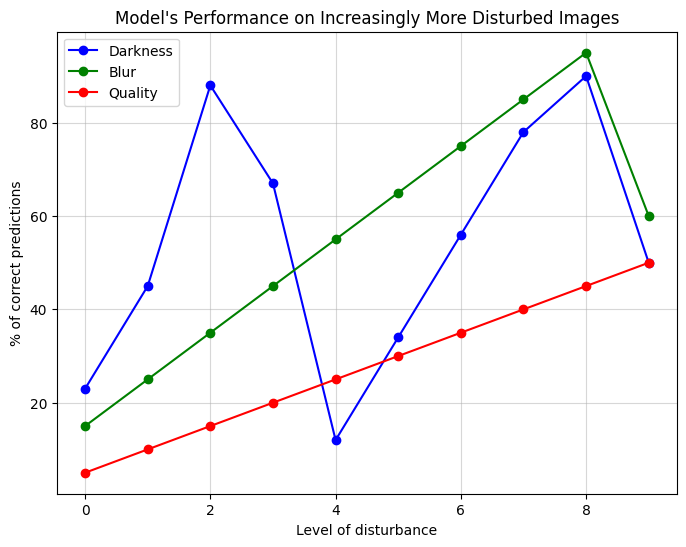

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_xy(data):
    labels = ['Darkness', 'Blur', 'Quality']
    x = np.arange(10)
    colors = ['blue', 'green', 'red']
    plt.figure(figsize=(8, 6))
    for i, y in enumerate(data):
        plt.plot(x, y, marker='o', color=colors[i], label=labels[i])
    plt.xlabel('Level of disturbance')
    plt.ylabel('% of correct predictions')
    plt.title('Model\'s Performance on Increasingly More Disturbed Images')
    plt.legend()
    plt.grid(True, alpha=0.5)
    plt.show()

data = [
    [23, 45, 88, 67, 12, 34, 56, 78, 90, 50],  # First array
    [15, 25, 35, 45, 55, 65, 75, 85, 95, 60],  # Second array
    [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]    # Third array
]

plot_multiple_xy(data)


In [ ]:
import numpy as np
import plotly.graph_objects as go
from scipy.interpolate import griddata

# Generate example data
np.random.seed(0)
#x = np.random.uniform(0, 100, 5)  # Blur severity
#y = np.random.uniform(0, 100, 5)  # Darkness severity
#z = np.random.uniform(0, 100, 5)  # Quality reduction severity



#x = np.array([1, 100, 1, 100, 1, 100, 1, 100, 20, 30, 40, 60])
#y = np.array([1, 1, 100, 100, 1, 1, 100, 100, 54, 12, 39, 77])
#z = np.array([1, 1, 1, 1, 100, 100, 100, 100, 1, 44, 44, 90])

x = np.array([1, 100, 1, 100, 1, 100, 1, 100])
y = np.array([10, 10, 90, 90, 10, 10, 90, 90])
z = np.array([20, 20, 20, 20, 80, 80, 80, 80])

def cnn_error_rate(x, y, z):
    return np.clip((x + y)/2, 0, 100)

c = cnn_error_rate(x, y, z)
#print(c)


grid_x, grid_y, grid_z = np.mgrid[0:100:50j, 0:100:50j, 0:100:50j]
grid_c = griddata((x, y, z), c, (grid_x, grid_y, grid_z), method='linear')
masked_grid_c = np.where(np.isnan(grid_c) | (grid_c == 0), -1, grid_c)

fig = go.Figure(data=go.Volume(
    x=grid_x.flatten(),
    y=grid_y.flatten(),
    z=grid_z.flatten(),
    value=masked_grid_c.flatten(),
    isomin=0,  # Keep valid values only
    isomax=100,
    opacity=1,
    surface_count=30,
    colorscale=[
        [0.0, 'green'],
        [0.5, 'yellow'],
        [1.0, 'red']
    ],
    colorbar=dict(title='CNN Error Rate (%)')
))

fig.update_layout(scene=dict(
    xaxis_title='Blur Severity',
    yaxis_title='Darkness Severity',
    zaxis_title='Quality Reduction Severity'
))
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(c)

[  1.   67.   17.5  83.5  17.5  83.5  34.  100.   27.5  28.   41.5]
